# PIQT Phantom Reports

## Distortion Using Grid

Distortion and scale factors based on grid point positions with respect to the nominal grid geometry

In [1]:
from os.path import join
import matplotlib.pyplot as plt
from mriqa.phantoms import PIQTDIST
from mriqa.reports import piqt_distortion_report, piqt_slice_profile_report
from pydicom import dcmread

### Distortion Measurements
#### General Notes

This is the Philips *PIQT* phantom - we need to get some details.

cf ACR: (190mm diameter, length 148mm) - filled with 10mM NiCl<sub>2</sub>, 75mM NaCl.

We should remove small rotations and shifts. Gross errors should be avoidable as there are unambiguous set up marks on the phantom. They seem to use multiple series (T<sub>1</sub>W, T<sub>2</sub>W etc) with quite course slices (5mm + 3mm).

#### Gradient Strength Calibration
The grid should give as gradient scales in X,Y. The length of the phantom would be our best bet in Z.
 - Full slice coverage (or a non-axial view)
 - Sufficient BW in S/S and R/O to minimise B<sub>0</sub> effects on scale/distortion
 - Relatively easy to do with edge detection and peak location
 - In-plane they take the phantom diameters at 4 angles at the level of the distortion grid
 - Expect 190mm &oslash; by 140mm length, both &plusmn;2mm
 - NB gradient amplifier warm up effects (really? for solid state amps?)

## Analysis of Grid Pattern

We need to decide on a phantom description to represent the spaced blobs. The only specific here are the number of blobs on a side, the blob spacing and the fact that the corners are missing. `Features` has generally been for the bounding ROIs so maybe that's not so useful.
Maybe we have just one `Feature` which is a `Grid`. Then we want the grid spacing and number of rows and cols. Either that of we have a `GridPositions` that just lists them all explicitly as a list of (x, y) tuples in mm. Or completely pre-calculate a bounding Box for each one.

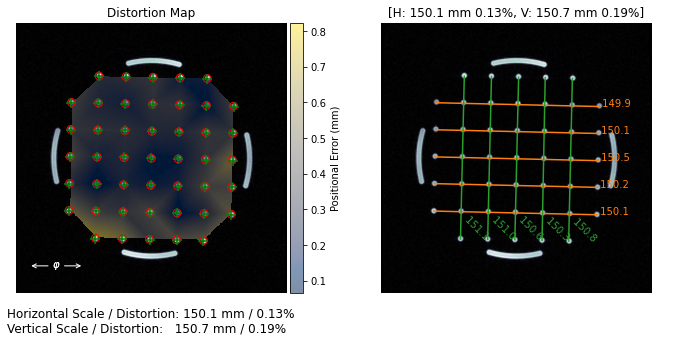

Protocol Orientation PhaseDirection  PixelBandwidth  Sensitivity  \
Series                                                                       
601     QA2H:MS,FE       Axial             RL           362.0     0.344609   

        HorizontalScale  HorizontalDistortion  VerticalScale  \
Series                                                         
601          150.149115               0.12942     150.746908   

        VerticalDistortion  
Series                      
601               0.185138

In [2]:
dobj = dcmread(join('13466700-1-601-QA2H-MS-FE', 'MR.0001.dcm'))
results = piqt_distortion_report(dobj, frame=3)
plt.show()
results

# Slice Profile

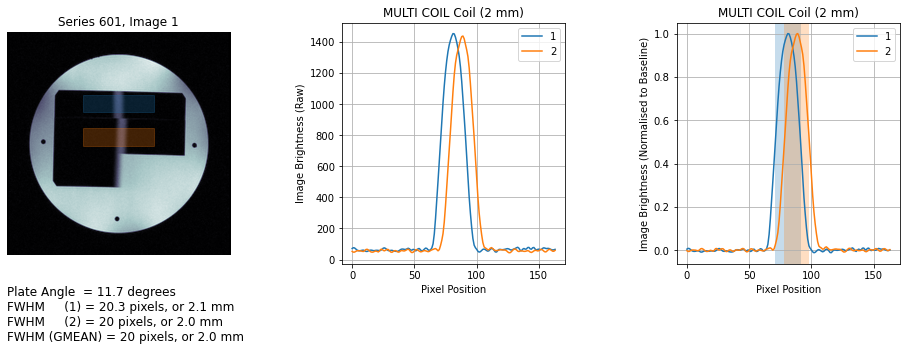

FWHM1Pixels   FWHM1MM  FWHM2Pixels   FWHM2MM  FWHMGMeanPixels  \
SliceThickness                                                                  
2.0               20.298542  2.052552    20.013854  2.023765        20.155696   

                FWHMGMeanMM  
SliceThickness               
2.0                2.038107

In [3]:
results = piqt_slice_profile_report(dobj, frame=5)
plt.show()
results